# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

## PART II: Prediction Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("bike-sharing_hourly.csv")

In [169]:
data.groupby(["season","mnth"]).count()

instant    yr    hr  holiday  weekday  workingday  weathersit  \
season mnth                                                                  
1      1        1429  1429  1429     1429     1429        1429        1429   
       2        1341  1341  1341     1341     1341        1341        1341   
       3         949   949   949      949      949         949         949   
       12        523   523   523      523      523         523         523   
2      3         524   524   524      524      524         524         524   
       4        1437  1437  1437     1437     1437        1437        1437   
       5        1488  1488  1488     1488     1488        1488        1488   
       6         960   960   960      960      960         960         960   
3      6         480   480   480      480      480         480         480   
       7        1488  1488  1488     1488     1488        1488        1488   
       8        1475  1475  1475     1475     1475        1475        1475   
       9        1053  1053  1053     1053     1053        1053        1053   
4      9         384   384   384      384      384         384         384   
       10       1451  1451  1451     1451     1451        1451        1451   
       11       1437  1437  1437     1437     1437        1437        1437   
       12        960   960   960      960      960         960         960   

             temp  atemp   hum  windspeed  casual  registered   cnt   day  
season mnth                                                                
1      1     1429   1429  1429       1429    1429        1429  1429  1429  
       2     1341   1341  1341       1341    1341        1341  1341  1341  
       3      949    949   949        949     949         949   949   949  
       12     523    523   523        523     523         523   523   523  
2      3      524    524   524        524     524         524   524   524  
       4     1437   1437  1437       1437    1437        1437  1437  1437  
       5     1488   1488  1488       1488    1488        1488  1488  1488  
       6      960    960   960        960     960         960   960   960  
3      6      480    480   480        480     480         480   480   480  
       7     1488   1488  1488       1488    1488        1488  1488  1488  
       8     1475   1475  1475       1475    1475        1475  1475  1475  
       9     1053   1053  1053       1053    1053        1053  1053  1053  
4      9      384    384   384        384     384         384   384   384  
       10    1451   1451  1451       1451    1451        1451  1451  1451  
       11    1437   1437  1437       1437    1437        1437  1437  1437  
       12     960    960   960        960     960         960   960   960

In [85]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data['day'] = data['dteday'].apply(lambda x: str(x)[-2:])

In [6]:
data = data.drop(["dteday","casual","registered","instant","yr"],axis=1)

# remove temp

In [7]:
data.to_csv('cleaned_data.csv', index=False)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
 12  day         17379 non-null  object 
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [178]:
# Split data into features and target
X = data.drop(["cnt"], axis=1).values 
y = data["cnt"].values

In [179]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [127]:
# Comment on why chose Random Forest Regressor

In [180]:
# Instatiate and fit random forest regressor
random_forest = RandomForestRegressor(random_state=42, max_features='sqrt')  
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [128]:
# Comment on hyperparameter tuning and on why this evaluation metric was chosen

In [181]:
# GridSearchCV for hyperparameter tuning
param_grid = {'max_depth': range(15,22)}

crossval_rf = GridSearchCV(random_forest, param_grid, scoring='neg_root_mean_squared_error', cv=5 , n_jobs=1, verbose=1)

crossval_rf.fit(X_train,y_train);

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [182]:
print("Best parameters set found on train set:")
print()
print(crossval_rf.best_params_)
print()
print("Grid scores on train set:")
print()
means = crossval_rf.cv_results_['mean_test_score']
stds = crossval_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, crossval_rf.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on train set:

{'max_depth': 20}

Grid scores on train set:

Accuracy = -79.293 (+/5.086) for {'max_depth': 15}
Accuracy = -78.245 (+/4.769) for {'max_depth': 16}
Accuracy = -77.249 (+/4.323) for {'max_depth': 17}
Accuracy = -77.030 (+/3.373) for {'max_depth': 18}
Accuracy = -76.451 (+/4.068) for {'max_depth': 19}
Accuracy = -75.640 (+/4.515) for {'max_depth': 20}
Accuracy = -75.705 (+/3.849) for {'max_depth': 21}


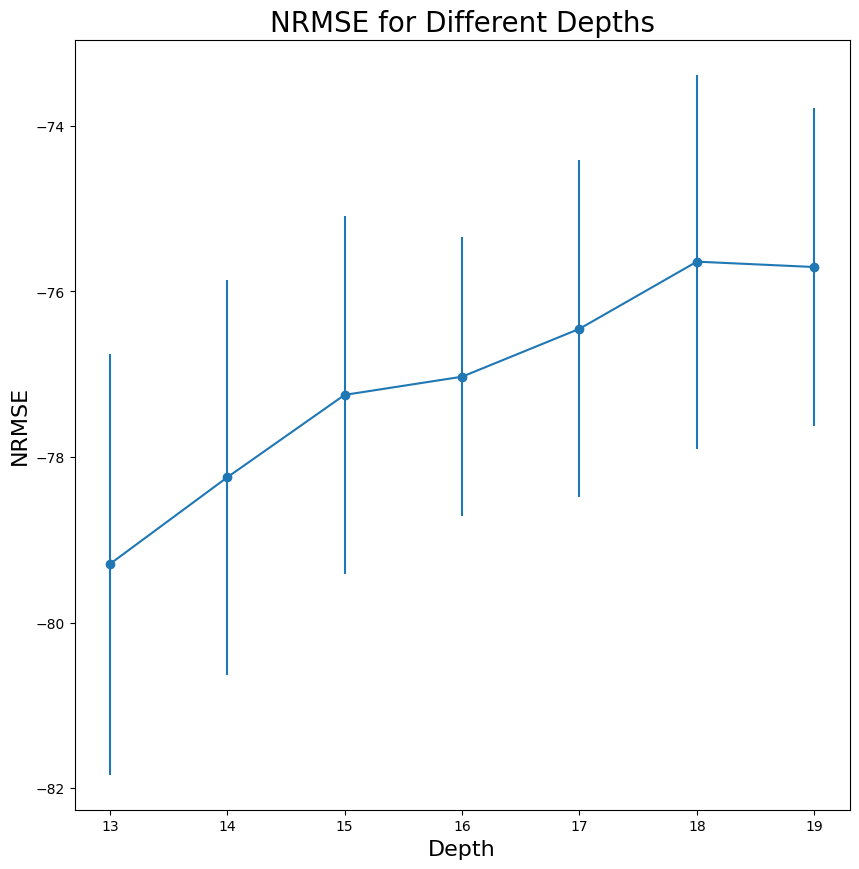

In [183]:
# Visualize the different accuracies for different depths of the decision tree
plt.figure(figsize=(10,10))
plt.errorbar(range(13,20,1), [m for m in means], yerr=stds, fmt='-o')
plt.title('NRMSE for Different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("NRMSE", fontsize=16)
plt.show()

In [192]:
# Save model for future use
best_est = crossval_rf.best_estimator_

joblib.dump(best_est,"Model.pkl")

['Model2.pkl']

In [193]:
model = joblib.load("Model.pkl")

In [186]:
# NRMSE for test set is slightly worse than for train set
print("Negative RMSE: Train = {0:.4f}".format(np.mean(cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error'))))
print("Negative RMSE: Test = {0:.4f}".format(np.mean(cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error'))))

Negative RMSE: Train = -75.6400
Negative RMSE: Test = -85.2923


In [190]:
drop_data = data.drop(["cnt"],axis=1)

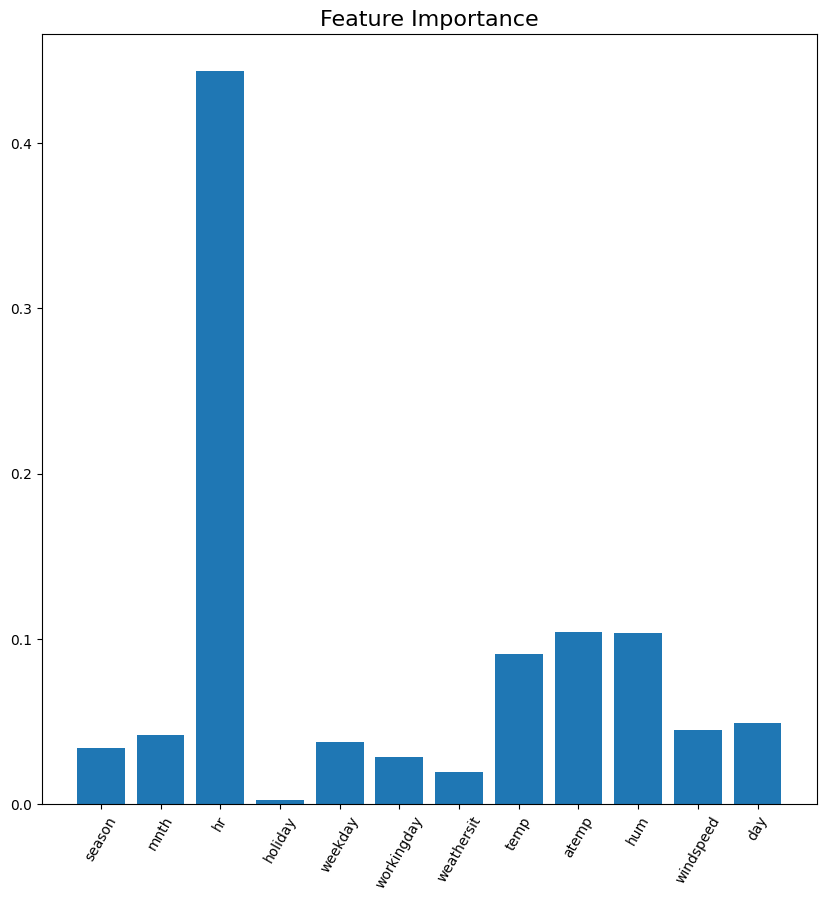

In [191]:
# Plot feature importances for the random forest
plt.figure(figsize=(10,10))
plt.bar(drop_data.columns, model.feature_importances_)
plt.xticks(rotation=60)
plt.title('Feature Importance', fontsize=16)
plt.show()

In [126]:
# Comment what the feature importance tells us about how to predict !

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###